In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
# sns.set_theme()
# sns.set_palette("husl")
# sns.set()


phone = pd.read_csv('smartphones.csv')
phone.head()

,brand_name,model,price,avg_rating,5G_or_not,processor_brand,num_cores,processor_speed,battery_capacity,fast_charging_available,...,internal_memory,screen_size,refresh_rate,num_rear_cameras,os,primary_camera_rear,primary_camera_front,extended_memory_available,resolution_height,resolution_width
0,apple,Apple iPhone 11,38999,7.3,0,bionic,6.0,2.65,3110.0,0,...,64,6.1,60,2,ios,12.0,12.0,0,1792,828
1,apple,Apple iPhone 11 (128GB),46999,7.5,0,bionic,6.0,2.65,3110.0,0,...,128,6.1,60,2,ios,12.0,12.0,0,1792,828
2,apple,Apple iPhone 11 Pro Max,109900,7.7,0,bionic,6.0,2.65,3500.0,1,...,64,6.5,60,3,ios,12.0,12.0,0,2688,1242
3,apple,Apple iPhone 12,51999,7.4,1,bionic,6.0,3.10,NaN,0,...,64,6.1,60,2,ios,12.0,12.0,0,2532,1170
4,apple,Apple iPhone 12 (128GB),55999,7.5,1,bionic,6.0,3.10,NaN,0,...,128,6.1,60,2,ios,12.0,12.0,0,2532,1170


In [2]:
#fill missing values of sheets

import pandas as pd

# Load the smartphone dataset
phone = pd.read_csv('smartphones.csv')

# Fill missing numerical values with the median of the column
num_cols = ['avg_rating', 'num_cores', 'processor_speed', 'battery_capacity', 'fast_charging', 'primary_camera_front']
for col in num_cols:
    phone[col] = phone[col].fillna(phone[col].median())

# Fill missing categorical values with the most frequent value of the column
cat_cols = ['processor_brand', 'os']
for col in cat_cols:
    phone[col] = phone[col].fillna(phone[col].mode()[0])




In [3]:
import pandas as pd

# Load the smartphone dataset
phone = pd.read_csv('smartphones.csv')

# Fill missing numerical values with the median of the column
num_cols = ['avg_rating', 'num_cores', 'processor_speed', 'battery_capacity', 'fast_charging', 'primary_camera_front']
for col in num_cols:
    phone[col] = phone[col].fillna(phone[col].median())

# Fill missing categorical values with the most frequent value of the column
cat_cols = ['processor_brand', 'os']
for col in cat_cols:
    phone[col] = phone[col].fillna(phone[col].mode()[0])

# Function to detect and handle outliers using the IQR method
def handle_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    # Replace outliers with the median value
    median_value = df[column].median()
    df.loc[(df[column] < lower_bound) | (df[column] > upper_bound), column] = median_value

# Apply the outlier handling function to all numerical columns
for col in num_cols:
    handle_outliers(phone, col)

# Verify the changes
phone.describe()


,price,avg_rating,5G_or_not,num_cores,processor_speed,battery_capacity,fast_charging_available,fast_charging,ram_capacity,internal_memory,screen_size,refresh_rate,num_rear_cameras,primary_camera_rear,primary_camera_front,extended_memory_available,resolution_height,resolution_width
count,980.000000,980.000000,980.000000,980.0,980.000000,980.000000,980.000000,980.000000,980.000000,980.000000,980.000000,980.000000,980.000000,980.000000,980.000000,980.000000,980.000000,980.000000
mean,32520.504082,7.897347,0.560204,8.0,2.421765,4819.869388,0.854082,41.332653,6.560204,141.036735,6.536765,92.256122,2.814286,50.319286,12.750000,0.630612,2214.663265,1075.852041
std,39531.812669,0.635479,0.496616,0.0,0.454757,313.750783,0.353205,26.512925,2.744378,107.134516,0.349162,28.988052,0.776441,33.000968,4.579538,0.482885,516.484254,290.164931
min,3499.000000,6.200000,0.000000,8.0,1.200000,3900.000000,0.000000,10.000000,1.000000,8.000000,3.540000,60.000000,1.000000,2.000000,0.000000,0.000000,480.000000,480.000000
25%,12999.000000,7.500000,0.000000,8.0,2.050000,4600.000000,1.000000,25.000000,4.000000,64.000000,6.500000,60.000000,2.000000,24.000000,8.000000,0.000000,1612.000000,1080.000000
50%,19994.500000,8.000000,1.000000,8.0,2.300000,5000.000000,1.000000,33.000000,6.000000,128.000000,6.580000,90.000000,3.000000,50.000000,16.000000,1.000000,2400.000000,1080.000000
75%,35491.500000,8.400000,1.000000,8.0,2.840000,5000.000000,1.000000,56.250000,8.000000,128.000000,6.670000,120.000000,3.000000,64.000000,16.000000,1.000000,2408.000000,1080.000000
max,650000.000000,8.900000,1.000000,8.0,3.220000,5600.000000,1.000000,125.000000,18.000000,1024.000000,8.030000,240.000000,4.000000,200.000000,25.000000,1.000000,3840.000000,2460.000000


In [4]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, r2_score

# Load the smartphone dataset
phone = pd.read_csv('smartphones.csv')

# Fill missing numerical values with the median of the column
num_cols = ['avg_rating', 'num_cores', 'processor_speed', 'battery_capacity', 'fast_charging', 'primary_camera_front']
for col in num_cols:
    phone[col] = phone[col].fillna(phone[col].median())

# Fill missing categorical values with the most frequent value of the column
cat_cols = ['processor_brand', 'os']
for col in cat_cols:
    phone[col] = phone[col].fillna(phone[col].mode()[0])

# Handle outliers using the IQR method
def handle_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    # Replace outliers with the median value
    median_value = df[column].median()
    df.loc[(df[column] < lower_bound) | (df[column] > upper_bound), column] = median_value

for col in num_cols:
    handle_outliers(phone, col)

# One-hot encoding for categorical features
phone = pd.get_dummies(phone, columns=['brand_name', 'processor_brand', 'os'], drop_first=True)

# Select features and target variable
X = phone.drop(columns=['price', 'model'])
y = phone['price']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a Linear Regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Absolute Error: {mae}")
print(f"R^2 Score: {r2}")


Mean Absolute Error: 9533.444361410686
R^2 Score: 0.8119109018915016


In [5]:
comparison_df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred}).reset_index(drop=True)
print(comparison_df.head(10))

   Actual     Predicted
0   79999  69837.992536
1   19990   8074.384246
2   59999  50738.474915
3   15990  32518.472759
4   36000  41655.760027
5   69990  65979.701001
6   31994  41548.000131
7   49990  37285.577534
8   19999  21147.933232
9   34999  16739.582764


In [6]:
phone.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 980 entries, 0 to 979
Data columns (total 78 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   model                       980 non-null    object 
 1   price                       980 non-null    int64  
 2   avg_rating                  980 non-null    float64
 3   5G_or_not                   980 non-null    int64  
 4   num_cores                   980 non-null    float64
 5   processor_speed             980 non-null    float64
 6   battery_capacity            980 non-null    float64
 7   fast_charging_available     980 non-null    int64  
 8   fast_charging               980 non-null    float64
 9   ram_capacity                980 non-null    int64  
 10  internal_memory             980 non-null    int64  
 11  screen_size                 980 non-null    float64
 12  refresh_rate                980 non-null    int64  
 13  num_rear_cameras            980 non

Columns in the dataset: Index(['brand_name', 'model', 'price', 'avg_rating', '5G_or_not',
       'processor_brand', 'num_cores', 'processor_speed', 'battery_capacity',
       'fast_charging_available', 'fast_charging', 'ram_capacity',
       'internal_memory', 'screen_size', 'refresh_rate', 'num_rear_cameras',
       'os', 'primary_camera_rear', 'primary_camera_front',
       'extended_memory_available', 'resolution_height', 'resolution_width'],
      dtype='object')
  brand_name                    model   price  avg_rating  5G_or_not  \
0      apple          Apple iPhone 11   38999         7.3          0   
1      apple  Apple iPhone 11 (128GB)   46999         7.5          0   
2      apple  Apple iPhone 11 Pro Max  109900         7.7          0   
3      apple          Apple iPhone 12   51999         7.4          1   
4      apple  Apple iPhone 12 (128GB)   55999         7.5          1   

  processor_brand  num_cores  processor_speed  battery_capacity  \
0          bionic        6.0

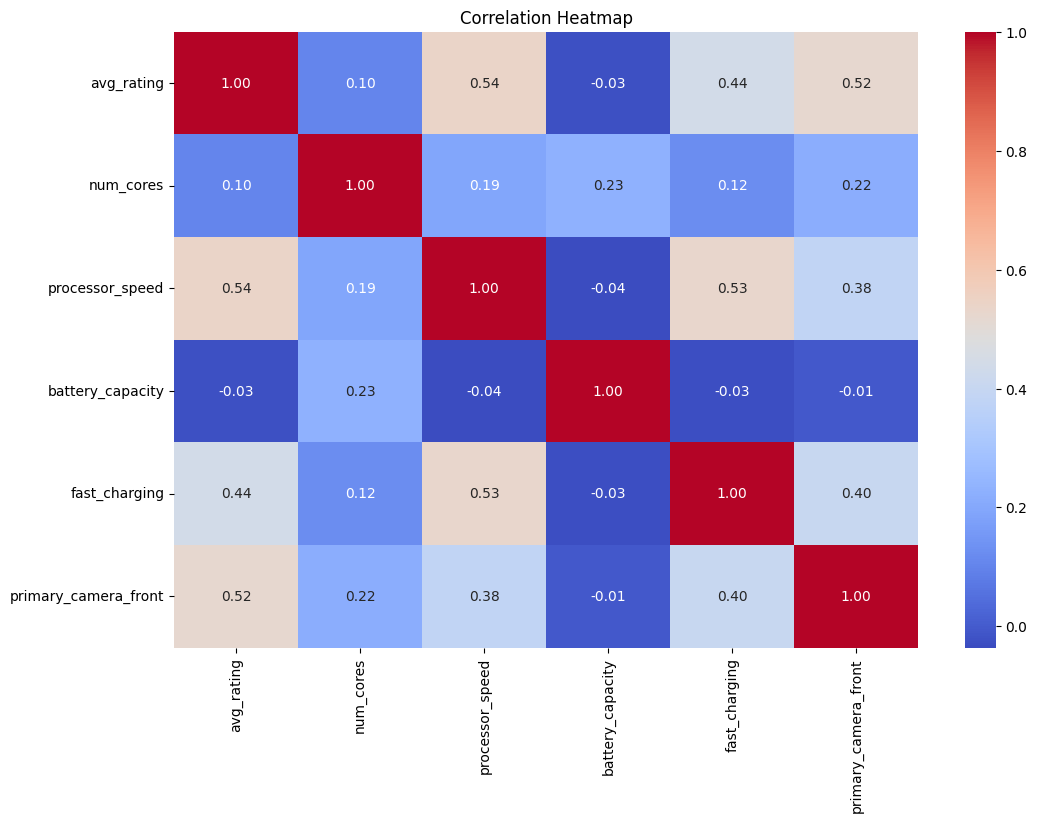

In [7]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Define the path to the dataset
file_path = 'smartphones.csv'

try:
    # Load the smartphone dataset
    phone = pd.read_csv(file_path)
    
    # Print the columns to verify them
    print("Columns in the dataset:", phone.columns)

    # Fill missing numerical values with the median of the column
    num_cols = ['avg_rating', 'num_cores', 'processor_speed', 'battery_capacity', 'fast_charging', 'primary_camera_front']
    for col in num_cols:
        if col in phone.columns:
            phone[col] = phone[col].fillna(phone[col].median())
        else:
            print(f"Warning: Column '{col}' not found in the dataset.")
    
    # Fill missing categorical values with the mode of the column
    cat_cols = ['brand', 'model', 'operating_system']
    for col in cat_cols:
        if col in phone.columns:
            phone[col] = phone[col].fillna(phone[col].mode()[0])
        else:
            print(f"Warning: Column '{col}' not found in the dataset.")
    
    # Display the first few rows of the dataframe
    print(phone.head())

    # Select only the numeric columns for the correlation matrix
    numeric_phone = phone[num_cols]

    # 2. Correlation heatmap
    plt.figure(figsize=(12, 8))
    correlation_matrix = numeric_phone.corr()
    sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
    plt.title('Correlation Heatmap')
    plt.show()

except FileNotFoundError:
    print(f"Error: The file '{file_path}' was not found. Please check the file path and try again.")
except Exception as e:
    print(f"An error occurred: {e}")


Columns in the dataset: Index(['brand_name', 'model', 'price', 'avg_rating', '5G_or_not',
       'processor_brand', 'num_cores', 'processor_speed', 'battery_capacity',
       'fast_charging_available', 'fast_charging', 'ram_capacity',
       'internal_memory', 'screen_size', 'refresh_rate', 'num_rear_cameras',
       'os', 'primary_camera_rear', 'primary_camera_front',
       'extended_memory_available', 'resolution_height', 'resolution_width'],
      dtype='object')
Mean Absolute Error: 9533.444361410686
R^2 Score: 0.8119109018915016
Predicted Price: -60558.82978205812


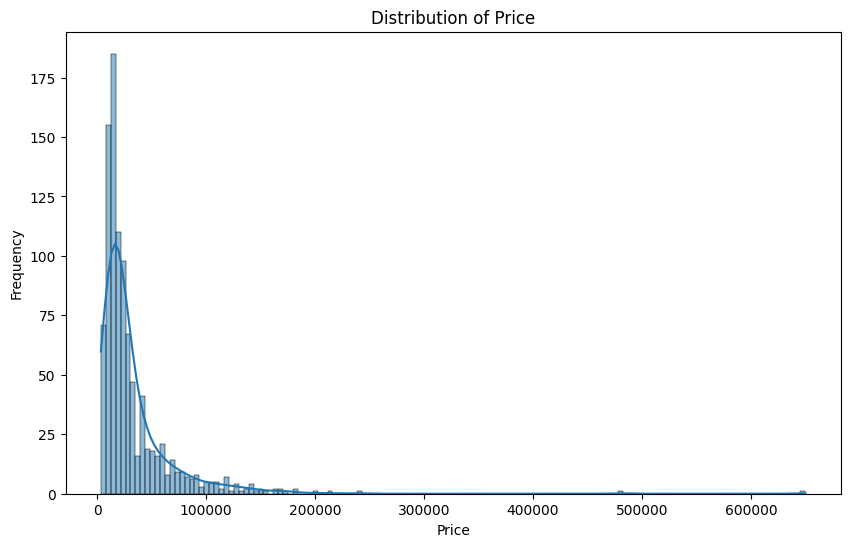

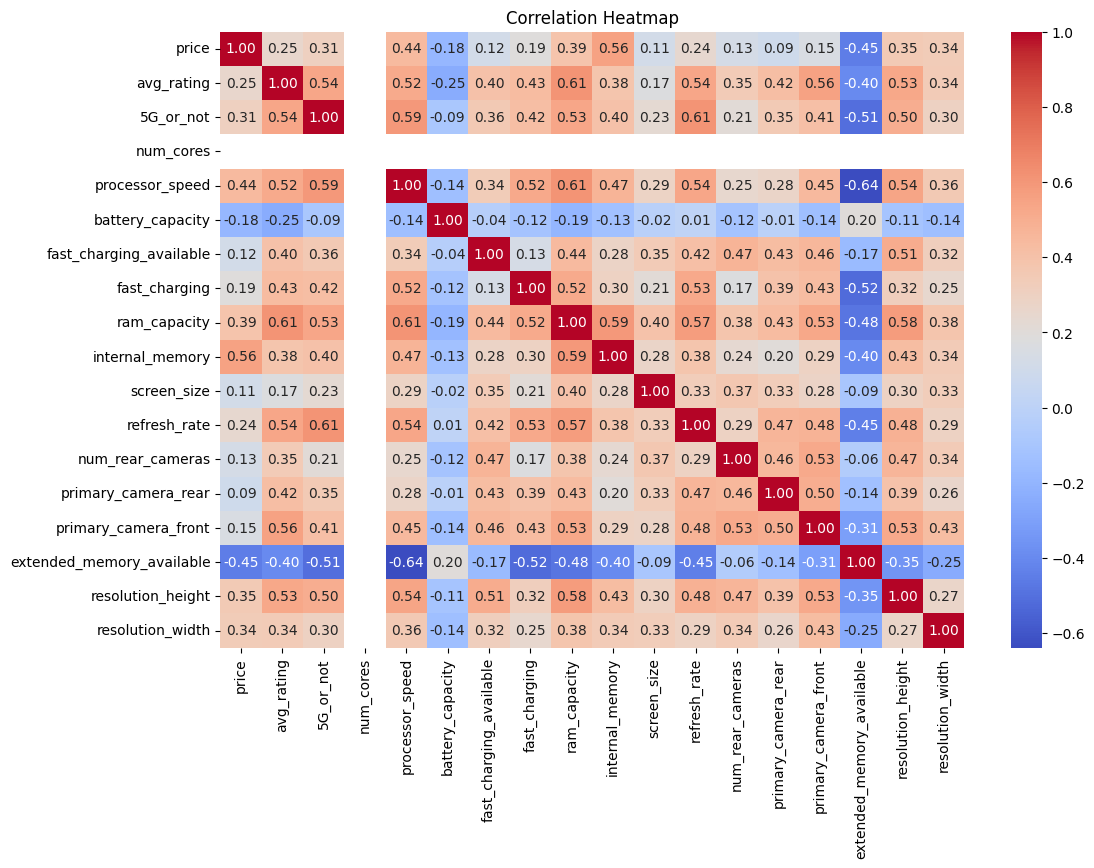

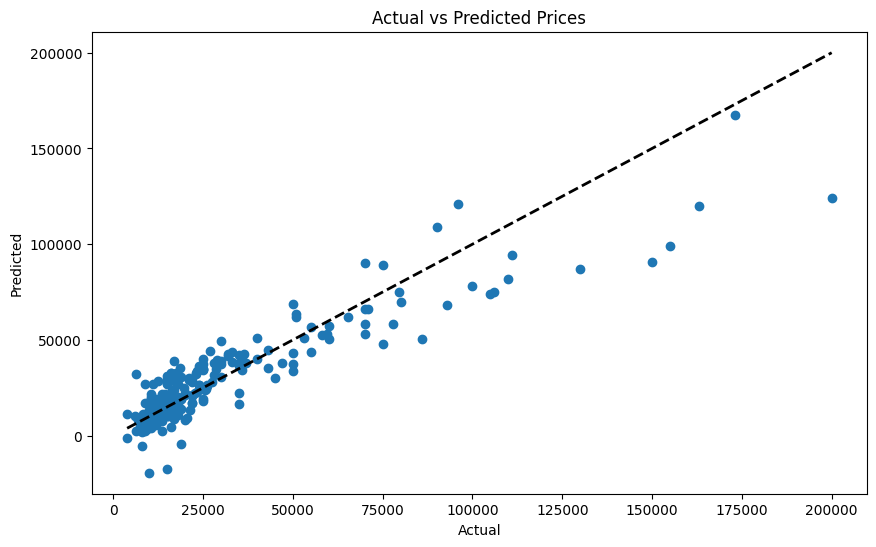

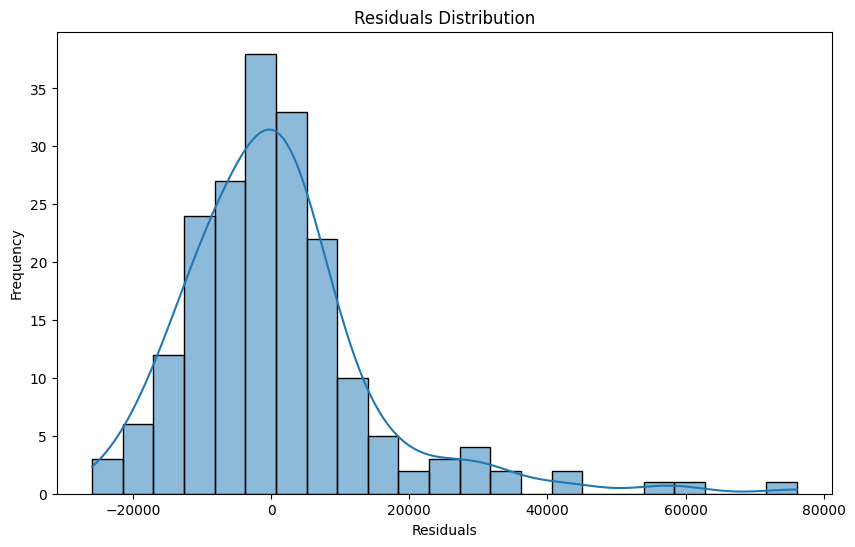

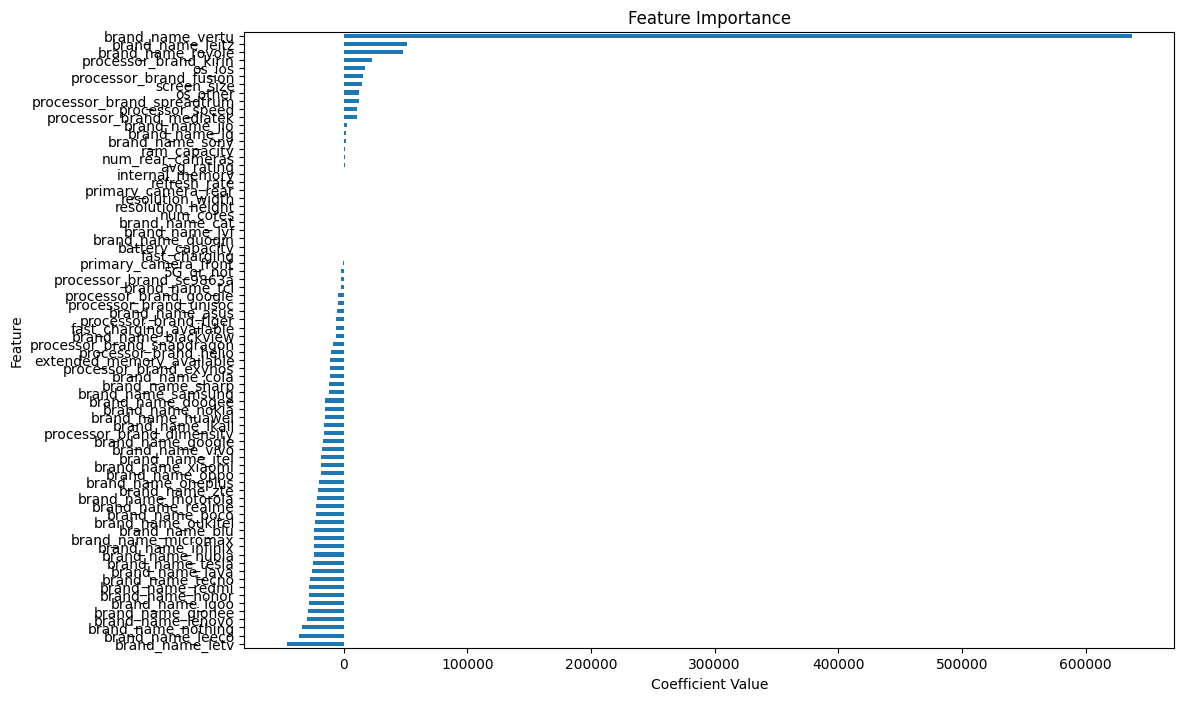

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, r2_score

# Load the smartphone dataset
file_path = 'smartphones.csv'
phone = pd.read_csv(file_path)

# Verify columns
print("Columns in the dataset:", phone.columns)

# Fill missing numerical values with the median of the column
num_cols = ['avg_rating', 'num_cores', 'processor_speed', 'battery_capacity', 'fast_charging', 'primary_camera_front']
for col in num_cols:
    if col in phone.columns:
        phone[col] = phone[col].fillna(phone[col].median())
    else:
        print(f"Warning: Column '{col}' not found in the dataset.")

# Fill missing categorical values with the most frequent value of the column
cat_cols = ['processor_brand', 'os']
for col in cat_cols:
    if col in phone.columns:
        phone[col] = phone[col].fillna(phone[col].mode()[0])
    else:
        print(f"Warning: Column '{col}' not found in the dataset.")

# Handle outliers using the IQR method
def handle_outliers(df, column):
    if column in df.columns:
        Q1 = df[column].quantile(0.25)
        Q3 = df[column].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        median_value = df[column].median()
        df.loc[(df[column] < lower_bound) | (df[column] > upper_bound), column] = median_value
    else:
        print(f"Warning: Column '{column}' not found in the dataset.")

for col in num_cols:
    handle_outliers(phone, col)

# One-hot encoding for categorical features
categorical_cols = ['brand_name', 'processor_brand', 'os']
for col in categorical_cols:
    if col in phone.columns:
        phone = pd.get_dummies(phone, columns=[col], drop_first=True)
    else:
        print(f"Warning: Column '{col}' not found in the dataset.")
        
# Select features and target variable
if 'price' in phone.columns and 'model' in phone.columns:
    X = phone.drop(columns=['price', 'model'])
    y = phone['price']
else:
    raise ValueError("Required columns 'price' or 'model' are missing from the dataset")

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a Linear Regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Absolute Error: {mae}")
print(f"R^2 Score: {r2}")

# Function to predict price based on user input
def predict_price(user_input):
    user_input_df = pd.DataFrame(user_input, index=[0])
    user_input_encoded = pd.get_dummies(user_input_df).reindex(columns=X.columns, fill_value=0)
    price_prediction = model.predict(user_input_encoded)
    return price_prediction[0]

# Example of user input for prediction
user_input = {
    'avg_rating': 4.5,
    'num_cores': 8,
    'processor_speed': 2.8,
    'battery_capacity': 4000,
    'fast_charging': 1,
    'primary_camera_front': 12,
    'brand_name_Apple': 1,
    'brand_name_Samsung': 0,
    'processor_brand_Qualcomm': 1,
    'os_Android': 0,
    # Add more fields as required based on the dataset
}

predicted_price = predict_price(user_input)
print(f"Predicted Price: {predicted_price}")

# Visualizations
# 1. Distribution of the target variable (price)
plt.figure(figsize=(10, 6))
sns.histplot(y, kde=True)
plt.title('Distribution of Price')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.show()

# 2. Correlation heatmap
plt.figure(figsize=(12, 8))
# Select only numeric columns for correlation matrix
numeric_cols = phone.select_dtypes(include=[np.number])
correlation_matrix = numeric_cols.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()

# 3. Actual vs Predicted plot
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs Predicted Prices')
plt.show()

# 4. Residual plot
plt.figure(figsize=(10, 6))
residuals = y_test - y_pred
sns.histplot(residuals, kde=True)
plt.title('Residuals Distribution')
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.show()
print
# 5. Feature importance (for linear regression coefficients)
coefficients = pd.Series(model.coef_, index=X.columns)
plt.figure(figsize=(12, 8))
coefficients.sort_values().plot(kind='barh')
plt.title('Feature Importance')
plt.xlabel('Coefficient Value')
plt.ylabel('Feature')
plt.show()


<Axes: ylabel='fast_charging'>

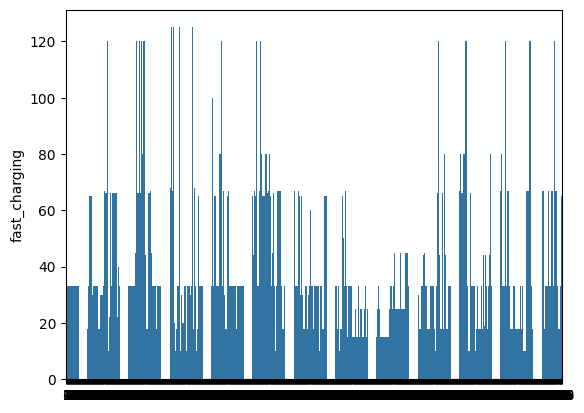

In [9]:
sns.barplot(phone['fast_charging'])

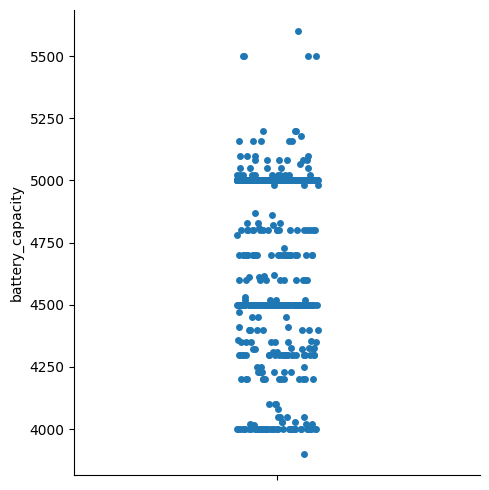

In [10]:
sns.catplot(phone['battery_capacity'])

In [11]:
sns.barplot(phone['brand_name'])


KeyError: 'brand_name'

<Axes: xlabel='count', ylabel='os'>

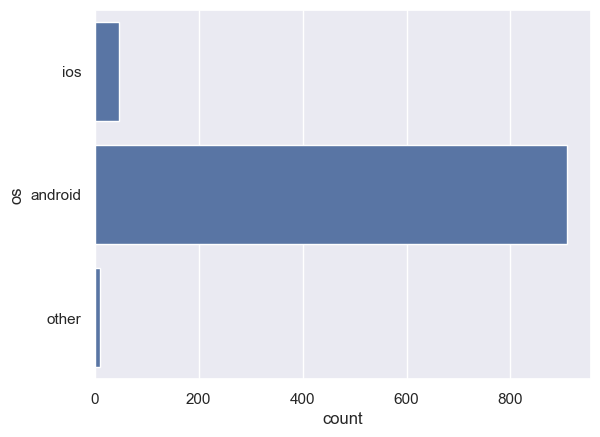

In [ ]:
sns.countplot(phone['os'])

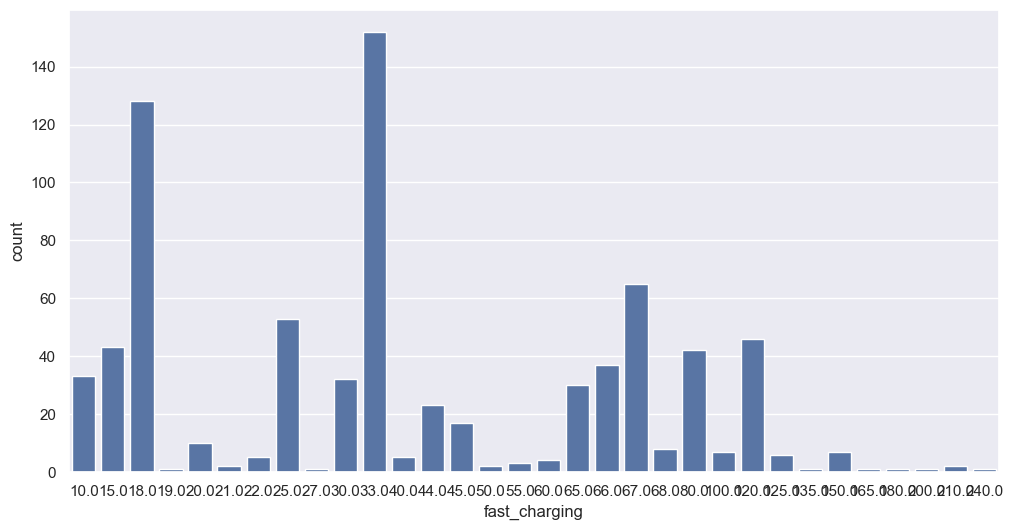

In [ ]:
plt.figure(figsize=(12, 6))
sns.countplot(data=phone, x='fast_charging')

# Show the plot
plt.show()
# done work